**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import sympy as sm
from scipy import optimize
from sympy import Symbol
from sympy.solvers import solve
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [93]:
import sympy as sp

# Define the symbols
L, kappa, alpha, nu, tau, w, G = sp.symbols('L kappa alpha nu tau w G')

# Define the utility function
C = kappa + (1 - tau) * w * L
utility = sp.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# Calculate the derivative of the utility function with respect to L
dV_dL = utility.diff(L)

# Solve for the optimal labor supply choice L*
L_star = sp.solve(dV_dL, L)[0]

# Print the expression for L*
print("Optimal labor supply choice:")
sp.pprint(L_star)


Optimal labor supply choice:
         __________________________________________
        ╱   ⎛     2  2          2        2    2  ⎞ 
κ⋅ν - ╲╱  ν⋅⎝4⋅α⋅τ ⋅w  - 8⋅α⋅τ⋅w  + 4⋅α⋅w  + κ ⋅ν⎠ 
───────────────────────────────────────────────────
                   2⋅ν⋅w⋅(τ - 1)                   


In [94]:
import math

# Given parameters
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16 ** 2)
w = 1.0
tau = 0.30

# Calculate the optimal labor supply for different values of G
G_values = [1.0, 2.0]
for G in G_values:
    # Calculate tilde(w)
    w_tilde = (1 - tau) * w
    # Calculate the optimal labor supply
    L_star = (-kappa + math.sqrt(kappa ** 2 + 4 * alpha / nu * w_tilde ** 2)) / (2 * w_tilde)
    
    # Print the result
    print(f"For G = {G}: L* = {L_star:.2f}")


For G = 1.0: L* = 15.30
For G = 2.0: L* = 15.30


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

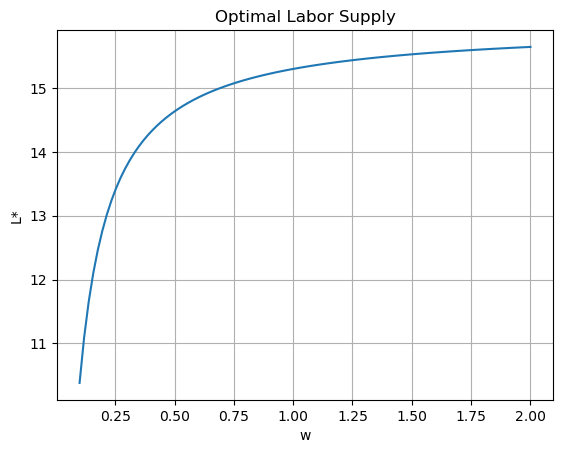

In [95]:
# Range of w values
w_values = np.linspace(0.1, 2.0, 100)  # Adjust the range as needed

# Calculate L* for each w value
L_star_values = []
for w in w_values:
    # Calculate tilde(w)
    w_tilde = (1 - tau) * w
    
    # Calculate the optimal labor supply
    L_star = (-kappa + np.sqrt(kappa ** 2 + 4 * alpha / nu * w_tilde ** 2)) / (2 * w_tilde)
    L_star_values.append(L_star)

# Plot the results
plt.plot(w_values, L_star_values)
plt.xlabel('w')
plt.ylabel('L*')
plt.title('Optimal Labor Supply')
plt.grid(True)
plt.show()


On the graph we see that L depends positively on w. We see that people work for more hours when the wage increases, but hours worked are marginally decreasing. Here we see that labour hours increase a lot when the wage increases up to 1, and after that it takes a bigger wage increase for people to work more hours


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


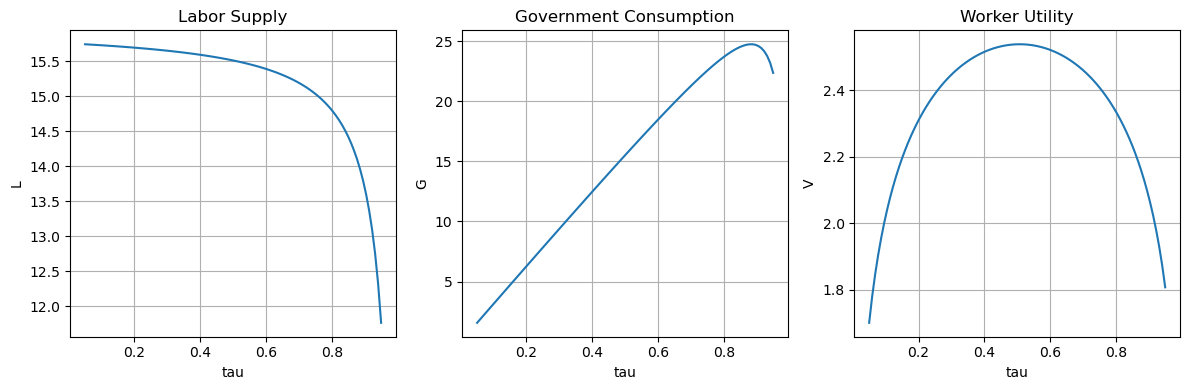

In [96]:
# Range of tau values
tau_values = np.linspace(0.05, 0.95, 100)  # Adjust the range as needed

# Initialize arrays to store results
L_values = []
G_values = []
V_values = []

# Calculate L, G, and V for each tau value
for tau in tau_values:
    # Calculate tilde(w)
    w_tilde = (1 - tau) * w
    
    # Calculate the optimal labor supply
    L_star = (-kappa + np.sqrt(kappa ** 2 + 4 * alpha / nu * w_tilde ** 2)) / (2 * w_tilde)
    L_values.append(L_star)
    
    # Calculate government consumption
    G = tau * w * L_star
    G_values.append(G)
    
    # Calculate worker utility
    C = kappa + (1 - tau) * w * L_star
    V = np.log(C ** alpha * G ** (1 - alpha)) - nu * L_star ** 2 / 2
    V_values.append(V)

# Plot the results
plt.figure(figsize=(12, 4))

# Plot labor supply
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('tau')
plt.ylabel('L')
plt.title('Labor Supply')
plt.grid(True)

# Plot government consumption
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('tau')
plt.ylabel('G')
plt.title('Government Consumption')
plt.grid(True)

# Plot worker utility
plt.subplot(1, 3, 3)
plt.plot(tau_values, V_values)
plt.xlabel('tau')
plt.ylabel('V')
plt.title('Worker Utility')
plt.grid(True)

plt.tight_layout()
plt.show()


##### Graph for Labor Supply 
Here we see that labor hours decreases as the tax increases. This is because with a higher tax rate, the more hours worked will not be profitable, as the workers salary after taxes decreases. 

##### Graph for Government Consumption
Here we see that when the tax increases, the government consumption increases. This is because the government gets more money to spend. 

##### Graph for Worker Utility 
We see that worker utility increases for a tax up to 0,5, and then decreases for a tax bigger than 0,5. The optimal worker utility is when the tax is equal to 0,5. 


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [97]:
# Range of tau values
tau_values = np.linspace(0.05, 0.95, 100)  # Adjust the range as needed

# Initialize variables
V_max = -np.inf
tau_star = None

# Calculate worker utility for each tau value and find the maximum
for tau in tau_values:
    # Calculate tilde(w)
    w_tilde = (1 - tau) * w
    
    # Calculate the optimal labor supply
    L_star = (-kappa + np.sqrt(kappa ** 2 + 4 * alpha / nu * w_tilde ** 2)) / (2 * w_tilde)
    
    # Calculate government consumption
    G = tau * w * L_star
    
    # Calculate worker utility
    C = kappa + (1 - tau) * w * L_star
    V = np.log(C ** alpha * G ** (1 - alpha)) - nu * L_star ** 2 / 2
    
    # Update maximum utility and optimal tau
    if V > V_max:
        V_max = V
        tau_star = tau

# Print the result
print(f"The socially optimal tax rate tau*: {tau_star:.2f}")


The socially optimal tax rate tau*: 0.50


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [99]:
from scipy.optimize import fsolve
# Optimal tax rate from question 4
tau_star = 0.50

# Define the function to solve
def solve_G(G, tau):
    w_tilde = (1 - tau) * w
    
    # Define the function for the optimal labor supply
    def labor_supply(L):
        return (alpha * (kappa + (1 - tau) * w_tilde * L) ** ((sigma - 1) / sigma) +
                (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (1 - sigma)) - nu * L ** (1 + epsilon) / (1 + epsilon)
    
    # Solve for the optimal labor supply L_star
    L_star = fsolve(labor_supply, 10)[0]
    
    # Calculate the implied G
    implied_G = tau * w * L_star
    
    return implied_G - G

# Set 1 parameters
sigma_set1 = 1.001
rho_set1 = 1.001
epsilon_set1 = 1.0

# Set 2 parameters
sigma_set2 = 1.5
rho_set2 = 1.5
epsilon_set2 = 1.0

# Calculate G for set 1
sigma = sigma_set1
rho = rho_set1
epsilon = epsilon_set1

# Solve for G using fsolve
G_solution_set1 = fsolve(solve_G, 1.0, args=(tau_star,))

# Calculate G for set 2
sigma = sigma_set2
rho = rho_set2
epsilon = epsilon_set2

# Solve for G using fsolve
G_solution_set2 = fsolve(solve_G, 1.0, args=(tau_star,))

# Print the results
print(f"For Set 1: G = {G_solution_set1[0]:.2f}")
print(f"For Set 2: G = {G_solution_set2[0]:.2f}")


For Set 1: G = 11.00
For Set 2: G = 10.96


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [101]:
from scipy.optimize import minimize_scalar
# Define the objective function to maximize worker utility
def objective(tau):
    w_tilde = (1 - tau) * w
    
    # Define the function for the optimal labor supply
    def labor_supply(L):
        return ((alpha * (kappa + (1 - tau) * w_tilde * L) ** ((sigma - 1) / sigma) +
                 (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (1 - sigma))) ** (1 - rho) / (1 - rho) - nu * L ** (1 + epsilon) / (1 + epsilon)
    
    # Solve for the optimal labor supply L_star
    L_star = minimize(lambda L: -labor_supply(L), x0=10, bounds=[(0, 24)]).x[0]
    
    # Calculate worker utility
    C = kappa + (1 - tau) * w * L_star
    V = ((alpha * C ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (1 - sigma))) ** (1 - rho) / (1 - rho) - nu * L_star ** (1 + epsilon) / (1 + epsilon)
    
    return -V

# Constraint function: G = tau w L^star((1-tau)w, G)
def constraint(tau):
    w_tilde = (1 - tau) * w
    
    # Define the function for the optimal labor supply
    def labor_supply(L):
        return ((alpha * (kappa + (1 - tau) * w_tilde * L) ** ((sigma - 1) / sigma) +
                 (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (1 - sigma))) ** (1 - rho) / (1 - rho) - nu * L ** (1 + epsilon) / (1 + epsilon)
    
    # Solve for the optimal labor supply L_star
    L_star = minimize(lambda L: -labor_supply(L), x0=10, bounds=[(0, 24)]).x[0]
    
    # Calculate implied G
    implied_G = tau * w * L_star
    
    return G - implied_G

# Set 1 parameters
sigma_set1 = 1.001
rho_set1 = 1.001
epsilon_set1 = 1.0

# Set 2 parameters
sigma_set2 = 1.5
rho_set2 = 1.5
epsilon_set2 = 1.0

# Set 1: Find the socially optimal tax rate
sigma = sigma_set1
rho = rho_set1
epsilon = epsilon_set1
G = 1.0  # Specify the value of G

# Set 2: Find the socially optimal tax rate
sigma = sigma_set2
rho = rho_set2
epsilon = epsilon_set2
G = 2.0  # Specify the value of G

# Minimize the negative objective function subject to the constraint
result_set1 = minimize(objective, x0=0.5, constraints={'type': 'eq', 'fun': constraint})

tau_star_set1 = result_set1.x[0]
V_max_set1 = -result_set1.fun

print("Set 1:")
print("Optimal tax rate (tau_star):", tau_star_set1)
print("Maximum worker utility (V_max):", V_max_set1)

# Minimize the negative objective function subject to the constraint
result_set2 = minimize(objective, x0=0.5, constraints={'type': 'eq', 'fun': constraint})

tau_star_set2 = result_set2.x[0]
V_max_set2 = -result_set2.fun

print("Set 2:")
print("Optimal tax rate (tau_star):", tau_star_set2)
print("Maximum worker utility (V_max):", V_max_set2)


Set 1:
Optimal tax rate (tau_star): 0.5
Maximum worker utility (V_max): -2.402287067108053
Set 2:
Optimal tax rate (tau_star): 0.5
Maximum worker utility (V_max): -2.402287067108053


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [2]:
#define parameters
eta = 0.5
w = 1.0

kappas = [1.0, 2.0]

for kappa in kappas:
    ell = ((1 - eta) * kappa / w) ** (1 / eta)
    profit = kappa * ell ** (1 - eta) - w * ell
    print(f"For kappa = {kappa}:")
    print(f"Optimal effort level (ell_t): {ell}")
    print(f"Maximized profit: {profit}\n")

For kappa = 1.0:
Optimal effort level (ell_t): 0.25
Maximized profit: 0.25

For kappa = 2.0:
Optimal effort level (ell_t): 1.0
Maximized profit: 1.0



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [3]:

# Parameters
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01) ** (1 / 12)
T = 120
K = 10000

# Define h
def calculate_h(shocks):
    kappa = np.zeros(T)
    ell = np.zeros(T)
    profit = np.zeros(T)
    h_value = 0.0

    for t in range(T):
        if t == 0:
            kappa[t] = np.exp(-0.5 * sigma_epsilon ** 2 + shocks[t])
        else:
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + shocks[t])
        
        ell[t] = ((1 - eta) * kappa[t] / w) ** (1 / eta)
        profit[t] = kappa[t] * ell[t] ** (1 - eta) - w * ell[t]

        if t > 0 and ell[t] != ell[t - 1]:
            profit[t] -= iota

        h_value += R ** (-t) * profit[t]

    return h_value

# Shock series
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, T))

# Calculate H
H = np.mean([calculate_h(shocks) for shocks in shock_series])
print(f"H: {H}")

H: 27.725552255745804


We have calculate the H value to 27.73. if we choose a large value for K we get a more precise approximation for our expected value. 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [4]:
# Parameters
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01) ** (1 / 12)
T = 120
K = 10000
delta = 0.05

# Function to calculate h given shock series and policy
def calculate_h(shocks, delta):
    kappa = np.zeros(T)
    ell = np.zeros(T)
    profit = np.zeros(T)
    h_value = 0.0

    for t in range(T):
        if t == 0:
            kappa[t] = np.exp(-0.5 * sigma_epsilon ** 2 + shocks[t])
        else:
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + shocks[t])
        
        ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta)

        if t > 0 and abs(ell[t - 1] - ell_star) > delta:
            ell[t] = ell_star
        else:
            ell[t] = ell[t - 1]

        profit[t] = kappa[t] * ell[t] ** (1 - eta) - w * ell[t]

        if t > 0 and ell[t] != ell[t - 1]:
            profit[t] -= iota

        h_value += R ** (-t) * profit[t]

    return h_value

# Simulate shock series
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, T))

# Calculate H
H_with_policy = np.mean([calculate_h(shocks, delta) for shocks in shock_series])

# Compare profitability
improvement = H_with_policy - H

print(f"H with policy: {H_with_policy}")
print(f"Improvement in profitability: {improvement}")

H with policy: 28.149628094339143
Improvement in profitability: 0.42407583859333897


With the value of $\Delta=0.05$ we have H to 28.15 and we have an imporvement in protability on 0.42. os if we compared to the value we found in when $\Delta=0$. we have an improvement so the new policy is a substantailly impove to profitability.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01) ** (1 / 12)
T = 120
K = 10000
#define the function for h includning the shock series and policy
def calculate_h(shocks, delta):
    kappa = np.zeros(T)
    ell = np.zeros(T)
    profit = np.zeros(T)
    h_value = 0.0

    for t in range(T):
        if t == 0:
            kappa[t] = np.exp(-0.5 * sigma_epsilon ** 2 + shocks[t])
        else:
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + shocks[t])
        
        ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta)

        if t > 0 and abs(ell[t - 1] - ell_star) > delta:
            ell[t] = ell_star
        else:
            ell[t] = ell[t - 1]

        profit[t] = kappa[t] * ell[t] ** (1 - eta) - w * ell[t]

        if t > 0 and ell[t] != ell[t - 1]:
            profit[t] -= iota

        h_value += R ** (-t) * profit[t]

    return h_value

#  Define the function that minimize -H 
def objective(delta):
    np.random.seed(0)
    shock_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, T))
    h_values = [calculate_h(shocks, delta) for shocks in shock_series]
    return -np.mean(h_values)



This code take som time to run

In [6]:
#Optimization
result= optimize.minimize(objective,x0=0.05, method='nelder-mead')
optimal_delta= result.x[0]


In [7]:
optimal_H = -result.fun

In [8]:
#Print the optimal Delta and optimal value of H
print(f"optimal Delta: {optimal_delta}")
print(f"Optimal H: {optimal_H}")

optimal Delta: 0.07781250000000009
Optimal H: 28.20595333578049


We have now found the optimal value for Delta =  0.07781250000000009 and the optimal value for H =28.21.

Now it is possible to plot the values of delta and H in a diagram.

In [10]:
# define delta_values and H_values
delta_values = np.linspace(0,0.1,100)

Virker ikke :\

In [ ]:
for delta in delta_values:
    H_values =[-objective(delta )]

In [ ]:
#Plot
plt.figure(figsize=(9,7))
plt.plot(delta_values,H_values)
plt.ylabel('H')
plt.xlabel('$\Delta$')
plt.titel('Optimization')
plt.grid(True)
plt.show()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



An alternative policy would possibly be to improve profits by adjusting the number of hairdressers. We willl based it on the current demand shock but also demand shock from the past.

In [84]:

# Parameters
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01) ** (1 / 12)
T = 120
K = 10000
gamma = 0.1
n = 12

# Function to calculate h given shock series and alternative policy
def calculate_h(shocks, gamma, n):
    kappa = np.zeros(T)
    ell = np.zeros(T)
    profit = np.zeros(T)
    h_value = 0.0

    for t in range(T):
        if t == 0:
            kappa[t] = np.exp(-0.5 * sigma_epsilon ** 2 + shocks[t])
        else:
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + shocks[t])

        if t >= n:
            average_kappa = np.mean(kappa[t - n + 1 : t + 1])
        else:
            average_kappa = np.mean(kappa[:t + 1])

        ell_star = ((1 - eta) * average_kappa / w) ** (1 / eta)
        ell[t] = (1 - gamma) * ell[t - 1] + gamma * ell_star

        profit[t] = kappa[t] * ell[t] ** (1 - eta) - w * ell[t]

        if t > 0 and ell[t] != ell[t - 1]:
            profit[t] -= iota

        h_value += R ** (-t) * profit[t]

    return h_value

# Simulate shock series
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, T))

# Calculate H with alternative policy
H_alternative_policy = np.mean([calculate_h(shocks, gamma, n) for shocks in shock_series])

print(f"H with Alternative Policy: {H_alternative_policy}")

H with Alternative Policy: 26.136937534980984


we use our altnative policy over a large number of shocks. And we can that we get a value of the salon to 26,13. we can compare this value to the value of to question 1 and 2. we can see value of H i bigger in question 1 and 2.  

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [69]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

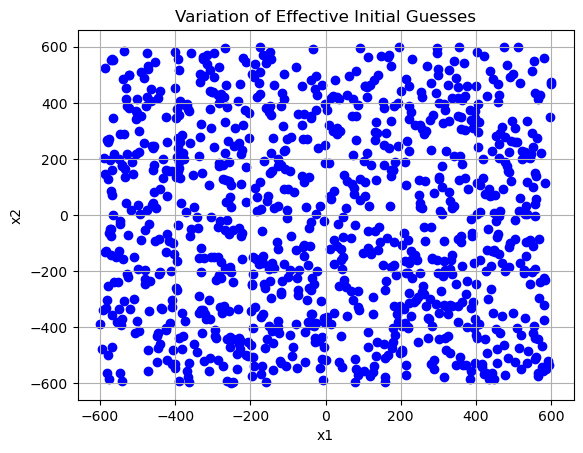

In [102]:

def griewank(x):
    return griewank_(x[0], x[1])
    
def griewank_(x1, x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1)) * np.cos(x2/np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    x_best = None
    f_best = None
    
    for k in range(max_iterations):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= warmup_iterations:
            chi_k = 0.50 * 2 / (1 + np.exp((k - warmup_iterations) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_best
            
            result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
            x_k_star = result.x
            f_k_star = result.fun
            
            if x_best is None or f_k_star < f_best:
                x_best = x_k_star
                f_best = f_k_star
            
            if f_best < tolerance:
                break
    
    return x_best

# Settings
bounds = [-600, 600]
tolerance = 1e-8
warmup_iterations = 10
max_iterations = 1000

# Optimizer
results = []
for k in range(max_iterations):
    x_k = np.random.uniform(bounds[0], bounds[1], size=2)
    results.append(x_k)

# Plot
import matplotlib.pyplot as plt

x_values = [x[0] for x in results]
y_values = [x[1] for x in results]

plt.scatter(x_values, y_values, c='blue', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Variation of Effective Initial Guesses')
plt.grid(True)
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

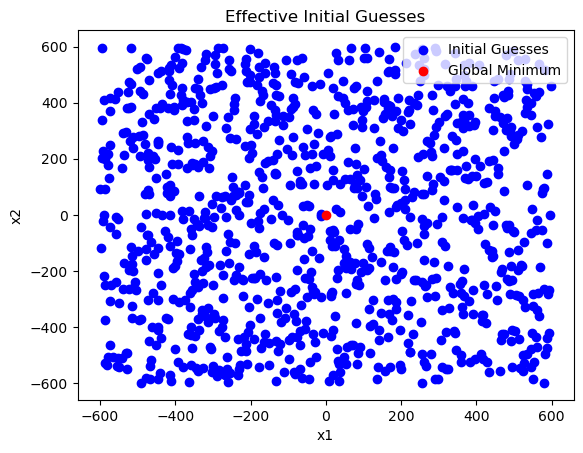

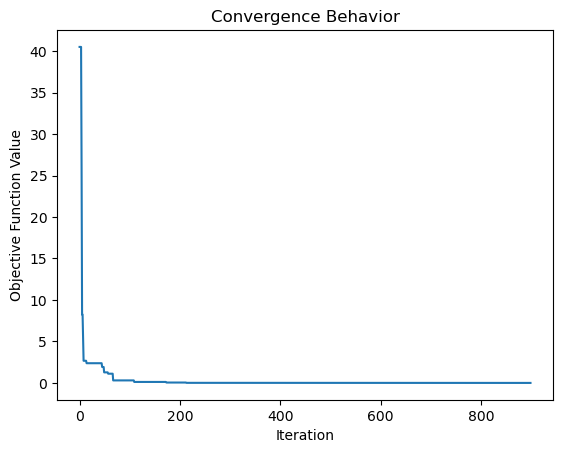

In [107]:
import numpy as np
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tolerance, K_warmup, K_max):
    x_best = None
    f_best = np.inf
    x_ast = np.random.uniform(bounds[0], bounds[1], 2)  # Initialize with a valid value
    
    x0_values = []
    f_values = []
    
    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], 2)
        x0_values.append(x_k)
        
        if k < K_warmup:
            continue
        
        chi_k = 0.5 * 2 / (1 + np.exp((k - K_warmup) / 100))
        x_k0 = chi_k * x_k + (1 - chi_k) * x_ast
        
        res = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        x_k_ast = res.x
        f_k_ast = res.fun
        
        if k == K_warmup or f_k_ast < f_best:
            x_ast = x_k_ast
            f_best = f_k_ast
        
        f_values.append(f_best)
            
    return x_ast, x0_values, f_values

# Settings
bounds = [-600, 600]
tolerance = 1e-8
K_warmup = 100
K_max = 1000

# Run the optimizer
x_ast, x0_values, f_values = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)

# Plot the effective initial guesses
x0_values = np.array(x0_values)
plt.scatter(x0_values[:, 0], x0_values[:, 1], c='blue', label='Initial Guesses')
plt.scatter(x_ast[0], x_ast[1], c='red', label='Global Minimum')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Effective Initial Guesses')
plt.show()

# Plot the convergence behavior
plt.plot(f_values)
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Behavior')
plt.show()
